In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
from skimage import io

from data_generator import *
from dice_loss import *
from unet import *

Using TensorFlow backend.


In [3]:
TRAIN_PATH = 'data/membrane/train/'
XTRAIN_PATH = f'{TRAIN_PATH}/image'
YTRAIN_PATH = f'{TRAIN_PATH}/label'

TEST_PATH = 'data/membrane/test/'
XTEST_PATH = f'{TEST_PATH}/image'
YTEST_PATH = f'{TEST_PATH}/label'

# STEPS=2000
STEPS = 50
EPOCHS=2
# EPOCHS = 1
MODEL_NAME = 'unet_membrane.hdf5'

## Data Generation and Augmentation

In [4]:
image_generator_train = ImageDataGenerator(
    rotation_range=2,
    rescale=1./255,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.0
)

# label_generator_train = ImageDataGenerator(
#     rotation_range=2,
#     shear_range=0.05,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     validation_split=0.0
# )

label_generator_train = ImageDataGenerator(
    rotation_range=2,
    rescale=1./255,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.0
)

image_generator_test = ImageDataGenerator(
    rescale=1./255,
    fill_mode='reflect',
    data_format='channels_last',
    validation_split=0.0
)

# label_generator_test = ImageDataGenerator(
#     # No rescale transform on target mask
#     fill_mode='reflect',
#     data_format='channels_last',
#     validation_split=0.0
# )

label_generator_test = ImageDataGenerator(
    rescale=1./255,
    fill_mode='reflect',
    data_format='channels_last',
    validation_split=0.0
)

In [5]:
train_generator = generator(
    TRAIN_PATH,
    image_generator_train,
    label_generator_train
)
test_generator = generator(
    TEST_PATH,
    image_generator_test,
    label_generator_test
)

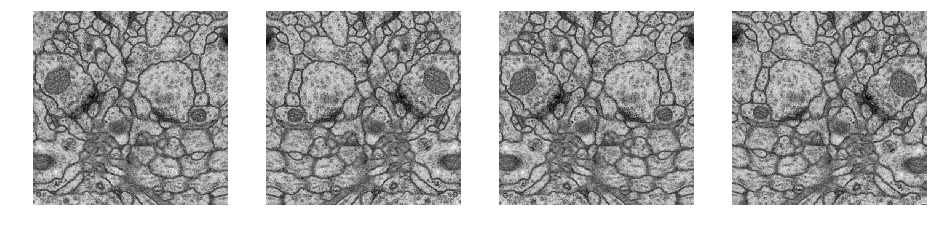

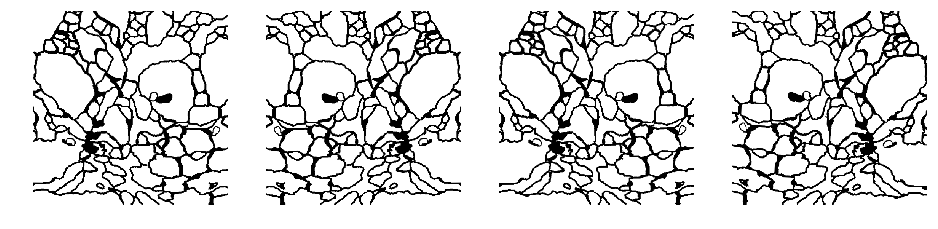

In [6]:
show_augmentation('data/membrane/train/image/0.png', image_generator_train, n_rows=1)
show_augmentation('data/membrane/train/label/0.png', label_generator_train, n_rows=1)

## Instantiate the U-Net

In [7]:
model = unet()
model.compile(
    optimizer = Adam(lr = 1e-4),
    loss=dice_coef_loss,
    metrics = [
        'accuracy',
        dice_coef,
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.
        metrics.TruePositives()
    ]
)
model_checkpoint = ModelCheckpoint(MODEL_NAME, monitor='loss',verbose=1, save_best_only=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Train the U-Net

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=STEPS,
    epochs=EPOCHS,
    callbacks=[model_checkpoint]
)

## Test the U-Net

In [ ]:
results = model.predict_generator(train_generator, 2, verbose=1)

# Visualize test results

In [ ]:
results[0]

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
# axs[0].imshow(x.reshape(256, 256), cmap='bone')
# axs[1].imshow(y.reshape(256, 256), cmap='bone')
axs[2].imshow(results[0].reshape(256, 256), vmin=0, vmax=1, cmap='bone')
plt.show()